# Segmenter Model Testing

By: Alfinata Yusuf Sitaba (1301190364)

## Install MMSegmentation

In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# Install PyTorch
!pip install torch==1.12.0 torchvision --extra-index-url https://download.pytorch.org/whl/cu113
# Install MMCV
!pip install openmim
!mim install mmcv-full==1.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu113
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.8/1.8 GB 152.8 MB/s eta 0:00:01tcmalloc: large alloc 1837596672 bytes == 0x21da000 @  0x7f4f5bf24680 0x7f4f5bf45824 0x5b3128 0x5bbc90 0x5f714c 0x64d800 0x527022 0x504866 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x5f5ee6 0x56bbe1 0x569d8a 0x5f60c3 0x56cc92 0x569d8a 0x5f60c3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.8/1.8 GB 131.9 MB/s eta 0:00:01tcmalloc: large alloc 2296995840 bytes == 0x6fa52000 @  0x7f4f5bf24680 0x7f4f5bf44da2 0x5f714c 0x64d800 0x527022 0x504866 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x5f5ee6 0x56bbe1 0x569d8a 0x5f60c3 0x56cc92 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a
     ━━━━━

In [ ]:
!rm -rf mmsegmentation
!git clone https://github.com/open-mmlab/mmsegmentation.git 
%cd mmsegmentation
!pip install -e .

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 13153, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 13153 (delta 8), reused 23 (delta 2), pack-reused 13098
Receiving objects: 100% (13153/13153), 15.33 MiB | 21.56 MiB/s, done.
Resolving deltas: 100% (9460/9460), done.
/content/mmsegmentation
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmsegmentation
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.8/648.8 KB 22.6 MB/s eta 0:00:00
  Running setup.py develop for mmsegmentation


In [ ]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

1.12.0+cu113 True
0.30.0


## Run Inference with MMSeg trained weight

In [ ]:
!mkdir checkpoints

# Load segmenter checkpoints

# Tiny variant
!wget https://download.openmmlab.com/mmsegmentation/v0.5/segmenter/segmenter_vit-t_mask_8x1_512x512_160k_ade20k/segmenter_vit-t_mask_8x1_512x512_160k_ade20k_20220105_151706-ffcf7509.pth -P checkpoints

# Small variant
!wget https://download.openmmlab.com/mmsegmentation/v0.5/segmenter/segmenter_vit-s_mask_8x1_512x512_160k_ade20k/segmenter_vit-s_mask_8x1_512x512_160k_ade20k_20220105_151706-511bb103.pth -P checkpoints

# Big variant
!wget https://download.openmmlab.com/mmsegmentation/v0.5/segmenter/segmenter_vit-b_mask_8x1_512x512_160k_ade20k/segmenter_vit-b_mask_8x1_512x512_160k_ade20k_20220105_151706-bc533b08.pth -P checkpoints


--2023-01-19 05:01:05--  https://download.openmmlab.com/mmsegmentation/v0.5/segmenter/segmenter_vit-t_mask_8x1_512x512_160k_ade20k/segmenter_vit-t_mask_8x1_512x512_160k_ade20k_20220105_151706-ffcf7509.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.246.48.207, 47.246.48.209, 47.246.48.205, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|47.246.48.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26945182 (26M) [application/octet-stream]
Saving to: ‘checkpoints/segmenter_vit-t_mask_8x1_512x512_160k_ade20k_20220105_151706-ffcf7509.pth’

segmenter_vit-t_mas 100%[===================>]  25.70M  1.99MB/s    in 27s     

2023-01-19 05:01:32 (959 KB/s) - ‘checkpoints/segmenter_vit-t_mask_8x1_512x512_160k_ade20k_20220105_151706-ffcf7509.pth’ saved [26945182/26945182]

--2023-01-19 05:01:32--  https://download.openmmlab.com/mmsegmentation/v0.5/segmenter/segmenter_vit-s_mask_8x1_512x512_160k_ade20k/segmenter_vit-s_mask_8x1_512x512_

In [ ]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

In [ ]:
# Load big variant for test inference
config_file = 'configs/segmenter/segmenter_vit-b_mask_8x1_512x512_160k_ade20k.py'
checkpoint_file = 'checkpoints/segmenter_vit-b_mask_8x1_512x512_160k_ade20k_20220105_151706-bc533b08.pth'

In [ ]:
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


load checkpoint from local path: checkpoints/segmenter_vit-b_mask_8x1_512x512_160k_ade20k_20220105_151706-bc533b08.pth


In [ ]:
# test a single image
img = 'demo/demo.png'
result = inference_segmentor(model, img)

/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


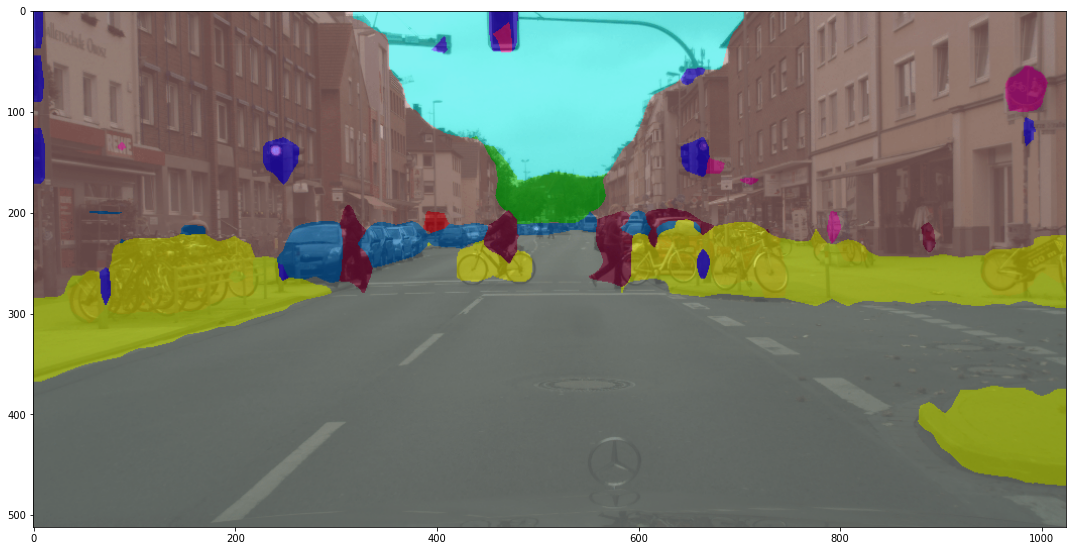

In [ ]:
# show the results
show_result_pyplot(model, img, result, get_palette('ade20k'))

## Load New Dataset

In [ ]:
# download and unzip
!wget http://dags.stanford.edu/data/iccv09Data.tar.gz -O stanford_background.tar.gz
!tar xf stanford_background.tar.gz

--2023-01-19 05:02:15--  http://dags.stanford.edu/data/iccv09Data.tar.gz
Resolving dags.stanford.edu (dags.stanford.edu)... 171.64.68.10
Connecting to dags.stanford.edu (dags.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14727974 (14M) [application/x-gzip]
Saving to: ‘stanford_background.tar.gz’

stanford_background 100%[===================>]  14.04M  3.95MB/s    in 3.6s    

2023-01-19 05:02:19 (3.95 MB/s) - ‘stanford_background.tar.gz’ saved [14727974/14727974]



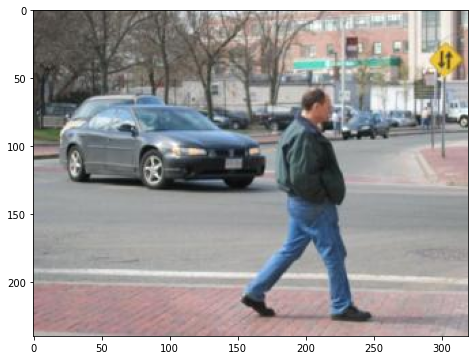

In [ ]:
# Let's take a look at the dataset
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('iccv09Data/images/6000124.jpg')
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

We need to convert the annotation into semantic map format as an image.

In [ ]:
import os.path as osp
import numpy as np
from PIL import Image
# convert dataset annotation to semantic segmentation map
data_root = 'iccv09Data'
img_dir = 'images'
ann_dir = 'labels'
# define class and plaette for better visualization
classes = ('sky', 'tree', 'road', 'grass', 'water', 'bldg', 'mntn', 'fg obj')
palette = [[128, 128, 128], [129, 127, 38], [120, 69, 125], [53, 125, 34], 
           [0, 11, 123], [118, 20, 12], [122, 81, 25], [241, 134, 51]]
for file in mmcv.scandir(osp.join(data_root, ann_dir), suffix='.regions.txt'):
  seg_map = np.loadtxt(osp.join(data_root, ann_dir, file)).astype(np.uint8)
  seg_img = Image.fromarray(seg_map).convert('P')
  seg_img.putpalette(np.array(palette, dtype=np.uint8))
  seg_img.save(osp.join(data_root, ann_dir, file.replace('.regions.txt', 
                                                         '.png')))

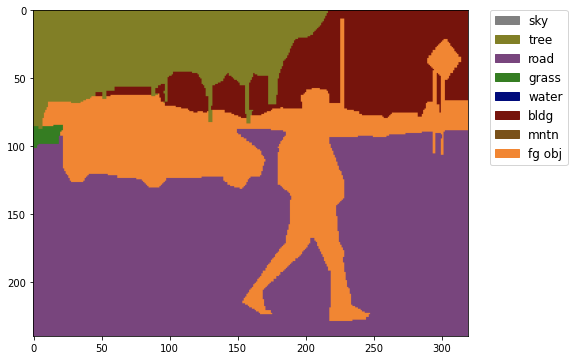

In [ ]:
# Let's take a look at the segmentation map we got
import matplotlib.patches as mpatches
img = Image.open('iccv09Data/labels/6000124.png')
plt.figure(figsize=(8, 6))
im = plt.imshow(np.array(img.convert('RGB')))

# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=np.array(palette[i])/255., 
                          label=classes[i]) for i in range(8)]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., 
           fontsize='large')

plt.show()

In [ ]:
# split train/val set randomly
split_dir = 'splits'
mmcv.mkdir_or_exist(osp.join(data_root, split_dir))
filename_list = [osp.splitext(filename)[0] for filename in mmcv.scandir(
    osp.join(data_root, ann_dir), suffix='.png')]
with open(osp.join(data_root, split_dir, 'train.txt'), 'w') as f:
  # select first 4/5 as train set
  train_length = int(len(filename_list)*4/5)
  f.writelines(line + '\n' for line in filename_list[:train_length])
with open(osp.join(data_root, split_dir, 'val.txt'), 'w') as f:
  # select last 1/5 as train set
  f.writelines(line + '\n' for line in filename_list[train_length:])

After downloading the data, we need to implement `load_annotations` function in the new dataset class `StanfordBackgroundDataset`.

In [ ]:
from mmseg.datasets.builder import DATASETS
from mmseg.datasets.custom import CustomDataset

@DATASETS.register_module()
class StanfordBackgroundDataset(CustomDataset):
  CLASSES = classes
  PALETTE = palette
  def __init__(self, split, **kwargs):
    super().__init__(img_suffix='.jpg', seg_map_suffix='.png', 
                     split=split, **kwargs)
    assert osp.exists(self.img_dir) and self.split is not None

## Load Another Dataset

In [ ]:
# Weirdly necessary to run gdown
pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
# Download and unzip the dataset
!gdown https://drive.google.com/uc?id=110CCsJytc9EfZDZhLUjjk6Ii8K2XjuyC
!unzip unPadData.zip 

Downloading...
From: https://drive.google.com/uc?id=110CCsJytc9EfZDZhLUjjk6Ii8K2XjuyC
To: /content/mmsegmentation/unPadData.zip
100% 3.28M/3.28M [00:00<00:00, 211MB/s]


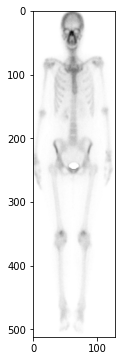

In [ ]:
# Let's take a look at the dataset

img = mmcv.imread('unPadData/images/0.png')
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

We need to convert the annotation into semantic map format as an image.

In [ ]:
# convert dataset annotation to semantic segmentation map
data_root = 'unPadData'
img_dir = 'images'
ann_dir = 'labels'
# define class and plaette for better visualization
classes = ('none',
           'tengkorak',
           'vertebra serviks',
           'vertebra toraks',
           'tulang rusuk', 
           'tulang dada',
           'tulang selangka',
           'tulang belikat',
           'humerus',
           'vertebra lumbalis',
           'tulang selangka',
           'panggul',
           'tulang paha')
palette = [[0, 0, 0],
           [176, 230, 13],
           [0, 151, 219],
           [126, 230, 225],
           [166, 55, 167], 
           [230, 157, 180],
           [167, 110, 77],
           [121, 0, 24],
           [56, 65, 184],
           [230, 218, 0],
           [230, 114, 35],
           [13, 187, 62],
           [230, 182, 22]]
for file in mmcv.scandir(osp.join(data_root, ann_dir), suffix='.txt'):
  seg_map = np.loadtxt(osp.join(data_root, ann_dir, file)).astype(np.uint8)
  seg_img = Image.fromarray(seg_map).convert('P')
  seg_img.putpalette(np.array(palette, dtype=np.uint8))
  seg_img.save(osp.join(data_root, ann_dir, file.replace('.txt', 
                                                         '.png')))

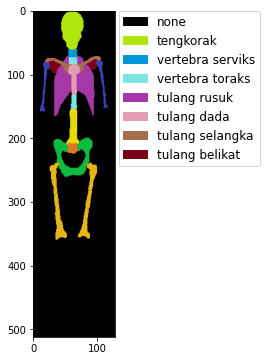

In [ ]:
# Let's take a look at the segmentation map we got
import matplotlib.patches as mpatches
img = Image.open('unPadData/labels/0.png')
plt.figure(figsize=(8, 6))
im = plt.imshow(np.array(img.convert('RGB')))

# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=np.array(palette[i])/255., 
                          label=classes[i]) for i in range(8)]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., 
           fontsize='large')

plt.show()

In [ ]:
# split train/val set randomly
split_dir = 'splits'
mmcv.mkdir_or_exist(osp.join(data_root, split_dir))
filename_list = [osp.splitext(filename)[0] for filename in mmcv.scandir(
    osp.join(data_root, ann_dir), suffix='.png')]
with open(osp.join(data_root, split_dir, 'train.txt'), 'w') as f:
  # select first 4/5 as train set
  train_length = int(len(filename_list)*4/5)
  f.writelines(line + '\n' for line in filename_list[:train_length])
with open(osp.join(data_root, split_dir, 'val.txt'), 'w') as f:
  # select last 1/5 as train set
  f.writelines(line + '\n' for line in filename_list[train_length:])

After downloading the data, we need to implement `load_annotations` function in the new dataset class `UnPadDataset`.

In [ ]:
@DATASETS.register_module()
class UnPadDataset(CustomDataset):
  CLASSES = classes
  PALETTE = palette
  def __init__(self, split, **kwargs):
    super().__init__(img_suffix='.png', seg_map_suffix='.png', 
                     split=split, **kwargs)
    assert osp.exists(self.img_dir) and self.split is not None

# Experiment

In [ ]:
MAX_ITERATIONS = 5000
LOG_CONFIG_INTERVAL = 50
EVALUATION_INTERVAL = 250
CHECKPOINT_CONFIG_INTERVAL = 250

## Tiny Variant



In [ ]:
from mmcv import Config
cfg = Config.fromfile('configs/segmenter/segmenter_vit-t_mask_8x1_512x512_160k_ade20k.py')
# cfg = Config.fromfile('configs/segmenter/segmenter_vit-s_mask_8x1_512x512_160k_ade20k.py')
from mmseg.apis import set_random_seed
from mmseg.utils import get_device

cfg.checkpoint_config.meta = dict(
    CLASSES = ('none',
           'tengkorak',
           'vertebra serviks',
           'vertebra toraks',
           'tulang rusuk', 
           'tulang dada',
           'tulang selangka',
           'tulang belikat',
           'humerus',
           'vertebra lumbalis',
           'tulang selangka',
           'panggul',
           'tulang paha'),
    PALETTE = [[0, 0, 0],
           [176, 230, 13],
           [0, 151, 219],
           [126, 230, 225],
           [166, 55, 167], 
           [230, 157, 180],
           [167, 110, 77],
           [121, 0, 24],
           [56, 65, 184],
           [230, 218, 0],
           [230, 114, 35],
           [13, 187, 62],
           [230, 182, 22]])

# # Since we use only one GPU, BN is used instead of SyncBN
# cfg.norm_cfg = dict(type='BN', requires_grad=True)
# cfg.model.backbone.norm_cfg = cfg.norm_cfg
# cfg.model.decode_head.norm_cfg = cfg.norm_cfg
# cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# # modify num classes of the model in decode/auxiliary head
# cfg.model.decode_head.num_classes = 8
# cfg.model.auxiliary_head.num_classes = 8

# Modify dataset type and path

#Old
# cfg.dataset_type = 'StanfordBackgroundDataset'

#New
cfg.dataset_type = 'UnPadDataset'
cfg.data_root = data_root

cfg.data.samples_per_gpu = 8
cfg.data.workers_per_gpu=8

cfg.img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
cfg.crop_size = (256, 256)
cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='Resize', img_scale=(256, 1024), ratio_range=(0.5, 2.0)),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(type='PhotoMetricDistortion'),
    dict(type='Normalize', **cfg.img_norm_cfg),
    dict(type='Pad', size=cfg.crop_size, pad_val=0, seg_pad_val=255),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_semantic_seg']),
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(256, 1024),
        # img_ratios=[0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **cfg.img_norm_cfg),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]


cfg.data.train.type = cfg.dataset_type
cfg.data.train.data_root = cfg.data_root
cfg.data.train.img_dir = img_dir
cfg.data.train.ann_dir = ann_dir
cfg.data.train.pipeline = cfg.train_pipeline
cfg.data.train.split = 'splits/train.txt'

cfg.data.val.type = cfg.dataset_type
cfg.data.val.data_root = cfg.data_root
cfg.data.val.img_dir = img_dir
cfg.data.val.ann_dir = ann_dir
cfg.data.val.pipeline = cfg.test_pipeline
cfg.data.val.split = 'splits/val.txt'

cfg.data.test.type = cfg.dataset_type
cfg.data.test.data_root = cfg.data_root
cfg.data.test.img_dir = img_dir
cfg.data.test.ann_dir = ann_dir
cfg.data.test.pipeline = cfg.test_pipeline
cfg.data.test.split = 'splits/val.txt'

# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch

cfg.load_from = 'checkpoints/segmenter_vit-t_mask_8x1_512x512_160k_ade20k_20220105_151706-ffcf7509.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './work_dirs/tutorial'

cfg.runner.max_iters = MAX_ITERATIONS
cfg.log_config.interval = LOG_CONFIG_INTERVAL
cfg.evaluation.interval = EVALUATION_INTERVAL
cfg.checkpoint_config.interval = CHECKPOINT_CONFIG_INTERVAL

# Set seed to facitate reproducing the result
cfg.seed = 0
set_random_seed(32, deterministic=False)
cfg.gpu_ids = range(1)
cfg.device = get_device()

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
checkpoint = 'https://download.openmmlab.com/mmsegmentation/v0.5/pretrain/segmenter/vit_tiny_p16_384_20220308-cce8c795.pth'
backbone_norm_cfg = dict(type='LN', eps=1e-06, requires_grad=True)
model = dict(
    type='EncoderDecoder',
    pretrained=
    'https://download.openmmlab.com/mmsegmentation/v0.5/pretrain/segmenter/vit_tiny_p16_384_20220308-cce8c795.pth',
    backbone=dict(
        type='VisionTransformer',
        img_size=(512, 512),
        patch_size=16,
        in_channels=3,
        embed_dims=192,
        num_layers=12,
        num_heads=3,
        drop_path_rate=0.1,
        attn_drop_rate=0.0,
        drop_rate=0.0,
        final_norm=True,
        norm_cfg=dict(type='LN', eps=1e-06, requires_grad=True),
        with_cls_token=True,
        interpolate_mode='bicubic'),
    decode_head=dict(
        type='SegmenterMaskTransformerHead',
        in_channels=192,
        channels=192,
        num_classes=150,
        num_layers=2,
        num_heads=3,
        embed_d

In [ ]:
from mmseg.datasets import build_dataset
from mmseg.models import build_segmentor
from mmseg.apis import train_segmentor


# Build the dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_segmentor(cfg.model)
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_segmentor(model, datasets, cfg, distributed=False, validate=True, 
                meta=dict())

2023-01-19 10:09:02,743 - mmseg - INFO - Loaded 59 images
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
2023-01-19 10:09:02,844 - mmseg - INFO - Loaded 15 images
2023-01-19 10:09:02,848 - mmseg - INFO - load checkpoint from local path: checkpoints/segmenter_vit-t_mask_8x1_512x512_160k_ade20k_20220105_151706-ffcf7509.pth
2023-01-19 10:09:02,891 - mmseg - INFO - Start running, host: root@cb81ef60b643, work_dir: /content/mmsegmentation/work_dirs/tutorial
2023-01-19 10:09:02,893 - mmseg - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) P

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 8.5 task/s, elapsed: 2s, ETA:     0s

2023-01-19 10:11:23,883 - mmseg - INFO - per class results:
2023-01-19 10:11:23,887 - mmseg - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|        none       | 86.27 | 93.04 |
|     tengkorak     | 78.48 |  86.4 |
|  vertebra serviks | 17.46 | 19.13 |
|  vertebra toraks  | 33.25 | 45.99 |
|    tulang rusuk   | 69.02 | 78.14 |
|    tulang dada    | 11.75 | 20.01 |
|  tulang selangka  |  0.22 |  0.25 |
|   tulang belikat  | 19.92 | 21.43 |
|      humerus      | 13.16 | 15.58 |
| vertebra lumbalis | 14.31 | 19.94 |
|  tulang selangka  | 29.11 | 55.28 |
|      panggul      | 30.22 | 76.24 |
|    tulang paha    |  5.76 |  9.04 |
+-------------------+-------+-------+
2023-01-19 10:11:23,889 - mmseg - INFO - Summary:
2023-01-19 10:11:23,891 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 84.31 | 31.46 | 41.58 |
+-------+-------+-------+
2023-01-19 10:11:23,893 - mmse

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 12.7 task/s, elapsed: 1s, ETA:     0s

2023-01-19 10:13:45,931 - mmseg - INFO - per class results:
2023-01-19 10:13:45,935 - mmseg - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|        none       | 86.75 | 92.49 |
|     tengkorak     | 78.37 | 80.52 |
|  vertebra serviks | 41.64 |  43.7 |
|  vertebra toraks  | 26.49 | 55.57 |
|    tulang rusuk   | 73.57 | 84.52 |
|    tulang dada    | 33.36 | 54.11 |
|  tulang selangka  | 21.38 | 34.12 |
|   tulang belikat  | 35.97 | 38.53 |
|      humerus      | 37.38 | 81.83 |
| vertebra lumbalis |  24.6 | 31.63 |
|  tulang selangka  | 43.76 | 65.68 |
|      panggul      | 41.01 | 65.28 |
|    tulang paha    | 14.97 | 22.08 |
+-------------------+-------+-------+
2023-01-19 10:13:45,937 - mmseg - INFO - Summary:
2023-01-19 10:13:45,941 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 86.16 | 43.02 | 57.7 |
+-------+-------+------+
2023-01-19 10:13:45,944 - mmseg - I

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 12.8 task/s, elapsed: 1s, ETA:     0s

2023-01-19 10:16:07,750 - mmseg - INFO - per class results:
2023-01-19 10:16:07,754 - mmseg - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|        none       | 88.78 | 96.25 |
|     tengkorak     | 74.08 | 75.03 |
|  vertebra serviks | 33.35 | 33.74 |
|  vertebra toraks  | 31.01 | 50.08 |
|    tulang rusuk   | 70.73 |  83.0 |
|    tulang dada    | 33.23 |  45.1 |
|  tulang selangka  | 16.63 | 20.87 |
|   tulang belikat  | 39.16 | 42.82 |
|      humerus      |  42.4 | 59.85 |
| vertebra lumbalis | 42.72 | 47.19 |
|  tulang selangka  | 34.55 | 37.38 |
|      panggul      | 46.89 | 60.49 |
|    tulang paha    | 17.79 | 24.12 |
+-------------------+-------+-------+
2023-01-19 10:16:07,759 - mmseg - INFO - Summary:
2023-01-19 10:16:07,763 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 88.36 | 43.95 | 51.99 |
+-------+-------+-------+
2023-01-19 10:16:07,765 - mmse

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 9.2 task/s, elapsed: 2s, ETA:     0s

2023-01-19 10:18:27,419 - mmseg - INFO - per class results:
2023-01-19 10:18:27,427 - mmseg - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|        none       | 86.23 | 89.71 |
|     tengkorak     |  84.2 | 89.95 |
|  vertebra serviks | 51.91 | 60.26 |
|  vertebra toraks  | 57.42 | 73.41 |
|    tulang rusuk   | 75.27 | 88.76 |
|    tulang dada    | 41.96 | 47.93 |
|  tulang selangka  | 33.59 |  46.9 |
|   tulang belikat  |  42.8 | 45.69 |
|      humerus      | 43.09 | 88.94 |
| vertebra lumbalis | 45.02 | 47.19 |
|  tulang selangka  | 49.31 | 66.73 |
|      panggul      | 51.54 | 69.15 |
|    tulang paha    | 28.37 | 68.44 |
+-------------------+-------+-------+
2023-01-19 10:18:27,429 - mmseg - INFO - Summary:
2023-01-19 10:18:27,432 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 86.79 | 53.13 | 67.93 |
+-------+-------+-------+
2023-01-19 10:18:27,439 - mmse

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 12.7 task/s, elapsed: 1s, ETA:     0s

2023-01-19 10:20:48,412 - mmseg - INFO - per class results:
2023-01-19 10:20:48,416 - mmseg - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|        none       | 87.83 | 93.05 |
|     tengkorak     | 73.82 | 74.28 |
|  vertebra serviks | 17.87 | 18.23 |
|  vertebra toraks  | 47.33 | 71.57 |
|    tulang rusuk   | 75.72 | 82.65 |
|    tulang dada    | 47.45 | 63.19 |
|  tulang selangka  | 34.89 |  49.5 |
|   tulang belikat  |  36.1 | 37.13 |
|      humerus      | 48.08 | 86.25 |
| vertebra lumbalis | 44.36 | 53.28 |
|  tulang selangka  |  48.0 | 67.12 |
|      panggul      | 46.34 | 70.64 |
|    tulang paha    | 25.72 |  45.7 |
+-------------------+-------+-------+
2023-01-19 10:20:48,418 - mmseg - INFO - Summary:
2023-01-19 10:20:48,422 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 87.79 | 48.73 | 62.51 |
+-------+-------+-------+
2023-01-19 10:20:48,427 - mmse

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 12.5 task/s, elapsed: 1s, ETA:     0s

2023-01-19 10:23:10,328 - mmseg - INFO - per class results:
2023-01-19 10:23:10,331 - mmseg - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|        none       | 88.71 | 93.78 |
|     tengkorak     | 72.62 | 74.36 |
|  vertebra serviks | 33.85 | 39.74 |
|  vertebra toraks  | 54.62 | 73.96 |
|    tulang rusuk   | 77.02 | 85.92 |
|    tulang dada    | 47.62 | 54.94 |
|  tulang selangka  | 28.19 |  36.0 |
|   tulang belikat  | 46.91 | 49.91 |
|      humerus      | 49.11 | 66.19 |
| vertebra lumbalis | 52.89 | 63.91 |
|  tulang selangka  | 49.87 | 75.45 |
|      panggul      |  52.2 | 72.53 |
|    tulang paha    | 28.56 | 53.51 |
+-------------------+-------+-------+
2023-01-19 10:23:10,333 - mmseg - INFO - Summary:
2023-01-19 10:23:10,334 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 88.79 | 52.47 | 64.63 |
+-------+-------+-------+
2023-01-19 10:23:10,339 - mmse

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 12.6 task/s, elapsed: 1s, ETA:     0s

2023-01-19 10:25:29,755 - mmseg - INFO - per class results:
2023-01-19 10:25:29,760 - mmseg - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|        none       | 88.88 | 93.37 |
|     tengkorak     | 81.28 | 82.28 |
|  vertebra serviks | 46.51 | 49.76 |
|  vertebra toraks  | 59.73 |  73.0 |
|    tulang rusuk   | 77.98 | 90.95 |
|    tulang dada    | 55.88 |  70.8 |
|  tulang selangka  | 35.35 | 46.94 |
|   tulang belikat  | 48.66 | 51.12 |
|      humerus      | 49.81 | 85.47 |
| vertebra lumbalis | 55.49 | 63.11 |
|  tulang selangka  | 47.19 | 55.45 |
|      panggul      | 50.55 | 64.67 |
|    tulang paha    | 29.38 | 54.13 |
+-------------------+-------+-------+
2023-01-19 10:25:29,762 - mmseg - INFO - Summary:
2023-01-19 10:25:29,769 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 89.14 | 55.9 | 67.77 |
+-------+------+-------+
2023-01-19 10:25:29,771 - mmseg - I

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 12.7 task/s, elapsed: 1s, ETA:     0s

2023-01-19 10:27:50,976 - mmseg - INFO - per class results:
2023-01-19 10:27:50,980 - mmseg - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|        none       | 89.64 | 93.25 |
|     tengkorak     |  82.4 | 83.39 |
|  vertebra serviks | 51.26 | 57.12 |
|  vertebra toraks  | 59.68 | 72.59 |
|    tulang rusuk   | 76.26 | 90.94 |
|    tulang dada    | 53.92 | 64.75 |
|  tulang selangka  | 41.32 | 55.03 |
|   tulang belikat  | 54.66 | 59.74 |
|      humerus      | 53.31 |  85.2 |
| vertebra lumbalis | 53.45 |  58.1 |
|  tulang selangka  | 51.37 | 66.81 |
|      panggul      |  50.6 | 72.73 |
|    tulang paha    | 35.28 | 63.27 |
+-------------------+-------+-------+
2023-01-19 10:27:50,983 - mmseg - INFO - Summary:
2023-01-19 10:27:50,985 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 89.73 | 57.93 | 70.99 |
+-------+-------+-------+
2023-01-19 10:27:50,986 - mmse

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 12.5 task/s, elapsed: 1s, ETA:     0s

2023-01-19 10:30:12,972 - mmseg - INFO - per class results:
2023-01-19 10:30:12,976 - mmseg - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|        none       | 88.79 | 92.11 |
|     tengkorak     | 84.05 | 87.04 |
|  vertebra serviks | 38.47 | 46.62 |
|  vertebra toraks  |  50.0 | 64.22 |
|    tulang rusuk   | 76.03 | 91.19 |
|    tulang dada    | 57.65 |  69.6 |
|  tulang selangka  | 43.05 | 61.57 |
|   tulang belikat  |  54.1 | 57.73 |
|      humerus      | 52.55 | 78.51 |
| vertebra lumbalis | 55.29 | 59.88 |
|  tulang selangka  | 53.28 | 76.03 |
|      panggul      | 57.39 | 75.46 |
|    tulang paha    | 32.45 | 68.72 |
+-------------------+-------+-------+
2023-01-19 10:30:12,978 - mmseg - INFO - Summary:
2023-01-19 10:30:12,983 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 89.05 | 57.16 | 71.44 |
+-------+-------+-------+
2023-01-19 10:30:12,985 - mmse

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 12.4 task/s, elapsed: 1s, ETA:     0s

2023-01-19 10:32:34,693 - mmseg - INFO - per class results:
2023-01-19 10:32:34,698 - mmseg - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|        none       | 89.87 | 93.45 |
|     tengkorak     | 80.94 | 81.77 |
|  vertebra serviks | 48.58 | 52.11 |
|  vertebra toraks  | 58.87 | 69.82 |
|    tulang rusuk   | 78.44 | 90.99 |
|    tulang dada    | 59.95 | 76.22 |
|  tulang selangka  | 43.79 | 57.29 |
|   tulang belikat  | 50.95 |  53.2 |
|      humerus      | 51.66 | 68.91 |
| vertebra lumbalis | 59.48 | 67.27 |
|  tulang selangka  | 54.63 | 75.83 |
|      panggul      | 58.28 | 80.51 |
|    tulang paha    | 36.47 | 69.83 |
+-------------------+-------+-------+
2023-01-19 10:32:34,703 - mmseg - INFO - Summary:
2023-01-19 10:32:34,704 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 90.11 | 59.38 | 72.09 |
+-------+-------+-------+
2023-01-19 10:32:34,707 - mmse

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 13.0 task/s, elapsed: 1s, ETA:     0s

2023-01-19 10:34:53,476 - mmseg - INFO - per class results:
2023-01-19 10:34:53,480 - mmseg - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|        none       | 90.02 | 93.94 |
|     tengkorak     | 78.79 |  79.4 |
|  vertebra serviks | 46.01 | 50.41 |
|  vertebra toraks  | 58.59 | 72.89 |
|    tulang rusuk   | 78.52 | 88.57 |
|    tulang dada    | 57.79 | 72.09 |
|  tulang selangka  | 44.31 | 58.72 |
|   tulang belikat  | 54.45 | 57.84 |
|      humerus      | 53.68 | 75.08 |
| vertebra lumbalis | 56.08 | 62.85 |
|  tulang selangka  | 51.99 | 66.34 |
|      panggul      | 59.17 | 74.67 |
|    tulang paha    | 36.49 | 69.69 |
+-------------------+-------+-------+
2023-01-19 10:34:53,482 - mmseg - INFO - Summary:
2023-01-19 10:34:53,484 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 90.22 | 58.91 | 70.96 |
+-------+-------+-------+
2023-01-19 10:34:53,486 - mmse

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 12.4 task/s, elapsed: 1s, ETA:     0s

2023-01-19 10:37:15,316 - mmseg - INFO - per class results:
2023-01-19 10:37:15,321 - mmseg - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|        none       | 89.56 | 92.64 |
|     tengkorak     | 83.41 | 84.83 |
|  vertebra serviks | 50.35 | 54.34 |
|  vertebra toraks  |  60.4 | 77.39 |
|    tulang rusuk   | 78.53 | 92.48 |
|    tulang dada    | 58.28 |  67.9 |
|  tulang selangka  | 46.42 |  75.1 |
|   tulang belikat  | 57.08 | 61.98 |
|      humerus      | 55.48 | 74.23 |
| vertebra lumbalis |  56.8 |  62.5 |
|  tulang selangka  | 54.12 | 71.45 |
|      panggul      | 54.68 | 78.86 |
|    tulang paha    | 34.76 | 69.97 |
+-------------------+-------+-------+
2023-01-19 10:37:15,324 - mmseg - INFO - Summary:
2023-01-19 10:37:15,327 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 89.78 | 59.99 | 74.13 |
+-------+-------+-------+
2023-01-19 10:37:15,329 - mmse

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 12.6 task/s, elapsed: 1s, ETA:     0s

2023-01-19 10:39:37,064 - mmseg - INFO - per class results:
2023-01-19 10:39:37,068 - mmseg - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|        none       | 88.55 |  92.2 |
|     tengkorak     | 80.85 | 85.66 |
|  vertebra serviks |  37.3 | 43.28 |
|  vertebra toraks  | 57.24 | 69.16 |
|    tulang rusuk   | 77.72 | 90.94 |
|    tulang dada    | 57.29 | 68.71 |
|  tulang selangka  | 45.24 | 67.94 |
|   tulang belikat  | 55.87 | 60.68 |
|      humerus      | 52.94 | 76.33 |
| vertebra lumbalis | 55.88 |  63.6 |
|  tulang selangka  | 50.13 | 59.94 |
|      panggul      | 55.57 | 72.14 |
|    tulang paha    | 31.78 | 68.31 |
+-------------------+-------+-------+
2023-01-19 10:39:37,071 - mmseg - INFO - Summary:
2023-01-19 10:39:37,077 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 88.97 | 57.41 | 70.68 |
+-------+-------+-------+
2023-01-19 10:39:37,079 - mmse

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 12.9 task/s, elapsed: 1s, ETA:     0s

2023-01-19 10:41:55,734 - mmseg - INFO - per class results:
2023-01-19 10:41:55,738 - mmseg - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|        none       | 89.45 | 93.21 |
|     tengkorak     | 80.29 | 81.51 |
|  vertebra serviks | 40.73 | 43.48 |
|  vertebra toraks  | 59.32 | 73.01 |
|    tulang rusuk   | 79.07 |  89.5 |
|    tulang dada    |  59.3 | 81.11 |
|  tulang selangka  | 45.22 | 79.04 |
|   tulang belikat  | 51.78 | 54.45 |
|      humerus      |  55.3 | 78.81 |
| vertebra lumbalis | 56.08 | 62.92 |
|  tulang selangka  |  53.9 | 67.81 |
|      panggul      | 53.81 |  73.8 |
|    tulang paha    | 33.36 | 64.84 |
+-------------------+-------+-------+
2023-01-19 10:41:55,742 - mmseg - INFO - Summary:
2023-01-19 10:41:55,744 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 89.66 | 58.28 | 72.57 |
+-------+-------+-------+
2023-01-19 10:41:55,746 - mmse

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 12.5 task/s, elapsed: 1s, ETA:     0s

2023-01-19 10:44:17,131 - mmseg - INFO - per class results:
2023-01-19 10:44:17,136 - mmseg - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|        none       | 89.76 | 93.79 |
|     tengkorak     | 80.09 |  81.0 |
|  vertebra serviks | 45.09 | 48.23 |
|  vertebra toraks  | 54.58 | 67.06 |
|    tulang rusuk   | 77.53 | 91.68 |
|    tulang dada    | 60.28 | 73.96 |
|  tulang selangka  | 46.24 | 69.15 |
|   tulang belikat  | 53.68 | 56.53 |
|      humerus      |  54.4 | 71.07 |
| vertebra lumbalis | 51.66 | 55.73 |
|  tulang selangka  | 52.46 | 63.81 |
|      panggul      | 56.75 | 71.95 |
|    tulang paha    | 35.16 | 67.54 |
+-------------------+-------+-------+
2023-01-19 10:44:17,138 - mmseg - INFO - Summary:
2023-01-19 10:44:17,142 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 89.97 | 58.28 | 70.12 |
+-------+-------+-------+
2023-01-19 10:44:17,144 - mmse

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 12.7 task/s, elapsed: 1s, ETA:     0s

2023-01-19 10:46:38,748 - mmseg - INFO - per class results:
2023-01-19 10:46:38,752 - mmseg - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|        none       | 89.85 | 93.51 |
|     tengkorak     | 79.97 | 80.74 |
|  vertebra serviks | 45.61 |  50.3 |
|  vertebra toraks  | 56.95 | 67.84 |
|    tulang rusuk   | 78.59 | 91.76 |
|    tulang dada    | 61.79 | 72.82 |
|  tulang selangka  | 47.97 | 70.24 |
|   tulang belikat  | 57.08 |  60.5 |
|      humerus      | 56.12 | 78.26 |
| vertebra lumbalis | 55.06 | 60.53 |
|  tulang selangka  | 53.69 | 68.08 |
|      panggul      | 58.07 | 71.98 |
|    tulang paha    | 37.01 | 72.84 |
+-------------------+-------+-------+
2023-01-19 10:46:38,753 - mmseg - INFO - Summary:
2023-01-19 10:46:38,756 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 90.17 | 59.83 | 72.26 |
+-------+-------+-------+
2023-01-19 10:46:38,760 - mmse

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 12.5 task/s, elapsed: 1s, ETA:     0s

2023-01-19 10:49:00,297 - mmseg - INFO - per class results:
2023-01-19 10:49:00,301 - mmseg - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|        none       | 89.72 | 92.74 |
|     tengkorak     | 84.13 | 85.58 |
|  vertebra serviks | 48.81 | 52.65 |
|  vertebra toraks  | 58.84 | 70.62 |
|    tulang rusuk   | 78.39 | 91.95 |
|    tulang dada    |  61.9 |  76.8 |
|  tulang selangka  | 49.45 | 73.22 |
|   tulang belikat  | 58.29 | 62.42 |
|      humerus      |  57.0 | 76.86 |
| vertebra lumbalis | 57.75 |  64.9 |
|  tulang selangka  | 54.18 | 67.75 |
|      panggul      | 59.27 | 77.41 |
|    tulang paha    | 37.08 | 76.95 |
+-------------------+-------+-------+
2023-01-19 10:49:00,303 - mmseg - INFO - Summary:
2023-01-19 10:49:00,305 - mmseg - INFO - 
+------+-------+------+
| aAcc |  mIoU | mAcc |
+------+-------+------+
| 90.1 | 61.14 | 74.6 |
+------+-------+------+
2023-01-19 10:49:00,308 - mmseg - INFO -

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 12.8 task/s, elapsed: 1s, ETA:     0s

2023-01-19 10:51:19,216 - mmseg - INFO - per class results:
2023-01-19 10:51:19,221 - mmseg - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|        none       | 89.82 | 93.21 |
|     tengkorak     | 80.84 | 81.69 |
|  vertebra serviks | 46.46 | 49.62 |
|  vertebra toraks  |  59.1 | 72.18 |
|    tulang rusuk   | 77.53 | 91.03 |
|    tulang dada    | 61.87 | 77.42 |
|  tulang selangka  | 49.14 | 71.92 |
|   tulang belikat  | 57.01 | 60.83 |
|      humerus      | 56.12 | 76.41 |
| vertebra lumbalis | 55.41 | 60.74 |
|  tulang selangka  | 53.61 | 67.94 |
|      panggul      | 59.79 | 76.96 |
|    tulang paha    | 36.78 | 73.19 |
+-------------------+-------+-------+
2023-01-19 10:51:19,223 - mmseg - INFO - Summary:
2023-01-19 10:51:19,230 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 90.13 | 60.27 | 73.32 |
+-------+-------+-------+
2023-01-19 10:51:19,232 - mmse

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 12.5 task/s, elapsed: 1s, ETA:     0s

2023-01-19 10:53:41,005 - mmseg - INFO - per class results:
2023-01-19 10:53:41,009 - mmseg - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|        none       | 89.91 | 93.42 |
|     tengkorak     | 80.85 | 81.82 |
|  vertebra serviks |  43.1 | 45.29 |
|  vertebra toraks  | 59.33 | 72.24 |
|    tulang rusuk   | 78.17 |  91.2 |
|    tulang dada    | 62.16 | 75.82 |
|  tulang selangka  | 47.56 | 70.96 |
|   tulang belikat  | 56.56 | 60.18 |
|      humerus      | 56.69 | 76.71 |
| vertebra lumbalis | 57.01 | 63.52 |
|  tulang selangka  | 53.91 | 69.49 |
|      panggul      | 59.53 | 73.89 |
|    tulang paha    | 37.26 | 73.98 |
+-------------------+-------+-------+
2023-01-19 10:53:41,012 - mmseg - INFO - Summary:
2023-01-19 10:53:41,014 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 90.24 | 60.16 | 72.96 |
+-------+-------+-------+
2023-01-19 10:53:41,017 - mmse

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 15/15, 12.5 task/s, elapsed: 1s, ETA:     0s

2023-01-19 10:56:02,242 - mmseg - INFO - per class results:
2023-01-19 10:56:02,247 - mmseg - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|        none       |  89.5 | 92.89 |
|     tengkorak     |  81.9 | 83.36 |
|  vertebra serviks | 45.18 |  48.2 |
|  vertebra toraks  | 59.65 | 73.18 |
|    tulang rusuk   | 78.46 | 90.52 |
|    tulang dada    | 61.52 | 74.88 |
|  tulang selangka  | 48.24 | 75.78 |
|   tulang belikat  | 56.19 | 60.15 |
|      humerus      | 55.72 | 75.49 |
| vertebra lumbalis | 55.94 |  62.3 |
|  tulang selangka  | 54.05 | 68.55 |
|      panggul      |  58.8 | 75.06 |
|    tulang paha    | 35.77 |  74.6 |
+-------------------+-------+-------+
2023-01-19 10:56:02,250 - mmseg - INFO - Summary:
2023-01-19 10:56:02,253 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 89.87 | 60.07 | 73.46 |
+-------+-------+-------+
2023-01-19 10:56:02,256 - mmse

/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


<Figure size 576x432 with 0 Axes>

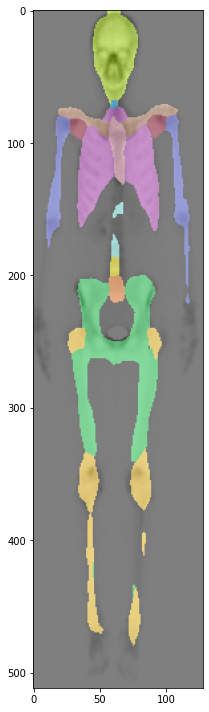

In [ ]:
# Old
# img = mmcv.imread('iccv09Data/images/0005079.jpg')

# New
img = mmcv.imread('unPadData/images/0.png')

model.cfg = cfg
result = inference_segmentor(model, img)
plt.figure(figsize=(8, 6))
show_result_pyplot(model, img, result, palette)

In [ ]:
# Load big variant for test inference
# config_file2 = 'configs/segmenter/segmenter_vit-b_mask_8x1_512x512_160k_ade20k.py'
checkpoint_file2 = 'work_dirs/tutorial/iter_5000.pth'

In [ ]:
# build the model from a config file and a checkpoint file
model = init_segmentor(cfg, checkpoint_file2, device='cuda:0')

load checkpoint from local path: work_dirs/tutorial/iter_5000.pth


KeyError: ignored

In [ ]:
# test a single image
img = mmcv.imread('unPadData/images/0.png')
result = inference_segmentor(model, img)
plt.figure(figsize=(8, 6))
show_result_pyplot(model, img, result, palette)

AssertionError: ignored

<Figure size 576x432 with 0 Axes>

In [ ]:
# show the results
show_result_pyplot(model, img, result, get_palette('UnPadDataset'))

ValueError: ignored

## Small Variant

In [ ]:
from mmcv import Config
cfg = Config.fromfile('configs/segmenter/segmenter_vit-s_mask_8x1_512x512_160k_ade20k.py')
from mmseg.apis import set_random_seed
from mmseg.utils import get_device

# # Since we use only one GPU, BN is used instead of SyncBN
# cfg.norm_cfg = dict(type='BN', requires_grad=True)
# cfg.model.backbone.norm_cfg = cfg.norm_cfg
# cfg.model.decode_head.norm_cfg = cfg.norm_cfg
# cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# # modify num classes of the model in decode/auxiliary head
# cfg.model.decode_head.num_classes = 8
# cfg.model.auxiliary_head.num_classes = 8

# Modify dataset type and path
cfg.dataset_type = 'StanfordBackgroundDataset'
cfg.data_root = data_root

cfg.data.samples_per_gpu = 8
cfg.data.workers_per_gpu=8

cfg.img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
cfg.crop_size = (256, 256)
cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='Resize', img_scale=(320, 240), ratio_range=(0.5, 2.0)),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(type='PhotoMetricDistortion'),
    dict(type='Normalize', **cfg.img_norm_cfg),
    dict(type='Pad', size=cfg.crop_size, pad_val=0, seg_pad_val=255),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_semantic_seg']),
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(320, 240),
        # img_ratios=[0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **cfg.img_norm_cfg),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]


cfg.data.train.type = cfg.dataset_type
cfg.data.train.data_root = cfg.data_root
cfg.data.train.img_dir = img_dir
cfg.data.train.ann_dir = ann_dir
cfg.data.train.pipeline = cfg.train_pipeline
cfg.data.train.split = 'splits/train.txt'

cfg.data.val.type = cfg.dataset_type
cfg.data.val.data_root = cfg.data_root
cfg.data.val.img_dir = img_dir
cfg.data.val.ann_dir = ann_dir
cfg.data.val.pipeline = cfg.test_pipeline
cfg.data.val.split = 'splits/val.txt'

cfg.data.test.type = cfg.dataset_type
cfg.data.test.data_root = cfg.data_root
cfg.data.test.img_dir = img_dir
cfg.data.test.ann_dir = ann_dir
cfg.data.test.pipeline = cfg.test_pipeline
cfg.data.test.split = 'splits/val.txt'

# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch

cfg.load_from = 'checkpoints/segmenter_vit-s_mask_8x1_512x512_160k_ade20k_20220105_151706-511bb103.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './work_dirs/tutorial'

cfg.runner.max_iters = MAX_ITERATIONS
cfg.log_config.interval = LOG_CONFIG_INTERVAL
cfg.evaluation.interval = EVALUATION_INTERVAL
cfg.checkpoint_config.interval = CHECKPOINT_CONFIG_INTERVAL

# Set seed to facitate reproducing the result
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
cfg.device = get_device()

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

In [ ]:
from mmseg.datasets import build_dataset
from mmseg.models import build_segmentor
from mmseg.apis import train_segmentor


# Build the dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model2 = build_segmentor(cfg.model)
# Add an attribute for visualization convenience
model2.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_segmentor(model2, datasets, cfg, distributed=False, validate=True, 
                meta=dict())

2023-01-11 03:32:13,300 - mmseg - INFO - Loaded 572 images
/content/mmsegmentation/mmseg/models/backbones/vit.py:219: UserWarning: DeprecationWarning: pretrained is deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is deprecated, '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/fre

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 143/143, 25.0 task/s, elapsed: 6s, ETA:     0s

2023-01-11 03:38:04,167 - mmseg - INFO - per class results:
2023-01-11 03:38:04,170 - mmseg - INFO - 
+--------+-------+-------+
| Class  |  IoU  |  Acc  |
+--------+-------+-------+
|  sky   | 83.46 | 89.78 |
|  tree  | 71.17 | 87.44 |
|  road  | 88.15 | 94.61 |
| grass  | 72.72 | 88.39 |
| water  |  83.9 | 92.69 |
|  bldg  | 78.77 | 86.51 |
|  mntn  | 53.59 |  61.7 |
| fg obj | 66.99 | 78.95 |
+--------+-------+-------+
2023-01-11 03:38:04,171 - mmseg - INFO - Summary:
2023-01-11 03:38:04,174 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 87.89 | 74.84 | 85.01 |
+-------+-------+-------+
2023-01-11 03:38:04,177 - mmseg - INFO - Iter(val) [143]	aAcc: 0.8789, mIoU: 0.7484, mAcc: 0.8501, IoU.sky: 0.8346, IoU.tree: 0.7117, IoU.road: 0.8815, IoU.grass: 0.7272, IoU.water: 0.8390, IoU.bldg: 0.7877, IoU.mntn: 0.5359, IoU.fg obj: 0.6699, Acc.sky: 0.8978, Acc.tree: 0.8744, Acc.road: 0.9461, Acc.grass: 0.8839, Acc.water: 0.9269, Acc.bldg: 0.865

<Figure size 576x432 with 0 Axes>

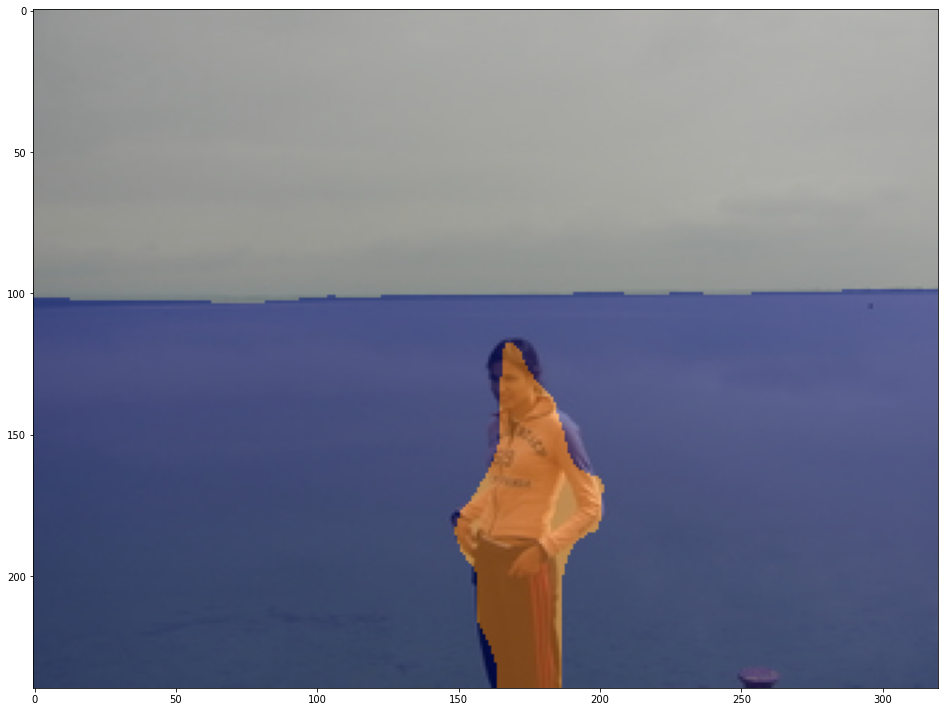

In [ ]:
img = mmcv.imread('iccv09Data/images/0005079.jpg')

model2.cfg = cfg
result = inference_segmentor(model2, img)
plt.figure(figsize=(8, 6))
show_result_pyplot(model2, img, result, palette)

## Big Variant

In [ ]:
from mmcv import Config
cfg = Config.fromfile('configs/segmenter/segmenter_vit-b_mask_8x1_512x512_160k_ade20k.py')
from mmseg.apis import set_random_seed
from mmseg.utils import get_device

# # Since we use only one GPU, BN is used instead of SyncBN
# cfg.norm_cfg = dict(type='BN', requires_grad=True)
# cfg.model.backbone.norm_cfg = cfg.norm_cfg
# cfg.model.decode_head.norm_cfg = cfg.norm_cfg
# cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# # modify num classes of the model in decode/auxiliary head
# cfg.model.decode_head.num_classes = 8
# cfg.model.auxiliary_head.num_classes = 8

# Modify dataset type and path
cfg.dataset_type = 'StanfordBackgroundDataset'
cfg.data_root = data_root

cfg.data.samples_per_gpu = 8
cfg.data.workers_per_gpu=8

cfg.img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
cfg.crop_size = (256, 256)
cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='Resize', img_scale=(320, 240), ratio_range=(0.5, 2.0)),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(type='PhotoMetricDistortion'),
    dict(type='Normalize', **cfg.img_norm_cfg),
    dict(type='Pad', size=cfg.crop_size, pad_val=0, seg_pad_val=255),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_semantic_seg']),
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(320, 240),
        # img_ratios=[0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **cfg.img_norm_cfg),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]


cfg.data.train.type = cfg.dataset_type
cfg.data.train.data_root = cfg.data_root
cfg.data.train.img_dir = img_dir
cfg.data.train.ann_dir = ann_dir
cfg.data.train.pipeline = cfg.train_pipeline
cfg.data.train.split = 'splits/train.txt'

cfg.data.val.type = cfg.dataset_type
cfg.data.val.data_root = cfg.data_root
cfg.data.val.img_dir = img_dir
cfg.data.val.ann_dir = ann_dir
cfg.data.val.pipeline = cfg.test_pipeline
cfg.data.val.split = 'splits/val.txt'

cfg.data.test.type = cfg.dataset_type
cfg.data.test.data_root = cfg.data_root
cfg.data.test.img_dir = img_dir
cfg.data.test.ann_dir = ann_dir
cfg.data.test.pipeline = cfg.test_pipeline
cfg.data.test.split = 'splits/val.txt'

# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch

cfg.load_from = 'checkpoints/segmenter_vit-b_mask_8x1_512x512_160k_ade20k_20220105_151706-bc533b08.pth'
# Set up working dir to save files and logs.
cfg.work_dir = './work_dirs/tutorial'

cfg.runner.max_iters = MAX_ITERATIONS
cfg.log_config.interval = LOG_CONFIG_INTERVAL
cfg.evaluation.interval = EVALUATION_INTERVAL
cfg.checkpoint_config.interval = CHECKPOINT_CONFIG_INTERVAL

# Set seed to facitate reproducing the result
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
cfg.device = get_device()

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

In [ ]:
from mmseg.datasets import build_dataset
from mmseg.models import build_segmentor
from mmseg.apis import train_segmentor


# Build the dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model3 = build_segmentor(cfg.model)
# Add an attribute for visualization convenience
model3.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_segmentor(model3, datasets, cfg, distributed=False, validate=True, 
                meta=dict())

2023-01-11 03:40:11,354 - mmseg - INFO - Loaded 572 images
2023-01-11 03:40:12,248 - mmseg - INFO - Loaded 143 images
2023-01-11 03:40:12,251 - mmseg - INFO - load checkpoint from local path: checkpoints/segmenter_vit-b_mask_8x1_512x512_160k_ade20k_20220105_151706-bc533b08.pth
2023-01-11 03:40:13,280 - mmseg - INFO - Start running, host: root@f2859a06f9c1, work_dir: /content/mmsegmentation/work_dirs/tutorial
2023-01-11 03:40:13,284 - mmseg - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) PolyLrUpdaterHook                  
(NORMAL      ) CheckpointHook                     
(LOW         ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) PolyLrUpdaterHook                  
(LOW         ) IterTimerHook                      
(LOW         ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_i

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 143/143, 20.8 task/s, elapsed: 7s, ETA:     0s

2023-01-11 03:52:42,970 - mmseg - INFO - per class results:
2023-01-11 03:52:42,974 - mmseg - INFO - 
+--------+-------+-------+
| Class  |  IoU  |  Acc  |
+--------+-------+-------+
|  sky   |  84.4 | 91.03 |
|  tree  |  71.1 | 84.68 |
|  road  | 88.55 | 94.95 |
| grass  | 73.21 | 87.73 |
| water  | 86.88 | 91.68 |
|  bldg  | 79.57 | 88.48 |
|  mntn  | 64.06 | 70.42 |
| fg obj | 68.16 | 80.39 |
+--------+-------+-------+
2023-01-11 03:52:42,977 - mmseg - INFO - Summary:
2023-01-11 03:52:42,979 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 88.42 | 76.99 | 86.17 |
+-------+-------+-------+
2023-01-11 03:52:42,982 - mmseg - INFO - Iter(val) [143]	aAcc: 0.8842, mIoU: 0.7699, mAcc: 0.8617, IoU.sky: 0.8440, IoU.tree: 0.7110, IoU.road: 0.8855, IoU.grass: 0.7321, IoU.water: 0.8688, IoU.bldg: 0.7957, IoU.mntn: 0.6406, IoU.fg obj: 0.6816, Acc.sky: 0.9103, Acc.tree: 0.8468, Acc.road: 0.9495, Acc.grass: 0.8773, Acc.water: 0.9168, Acc.bldg: 0.884

<Figure size 576x432 with 0 Axes>

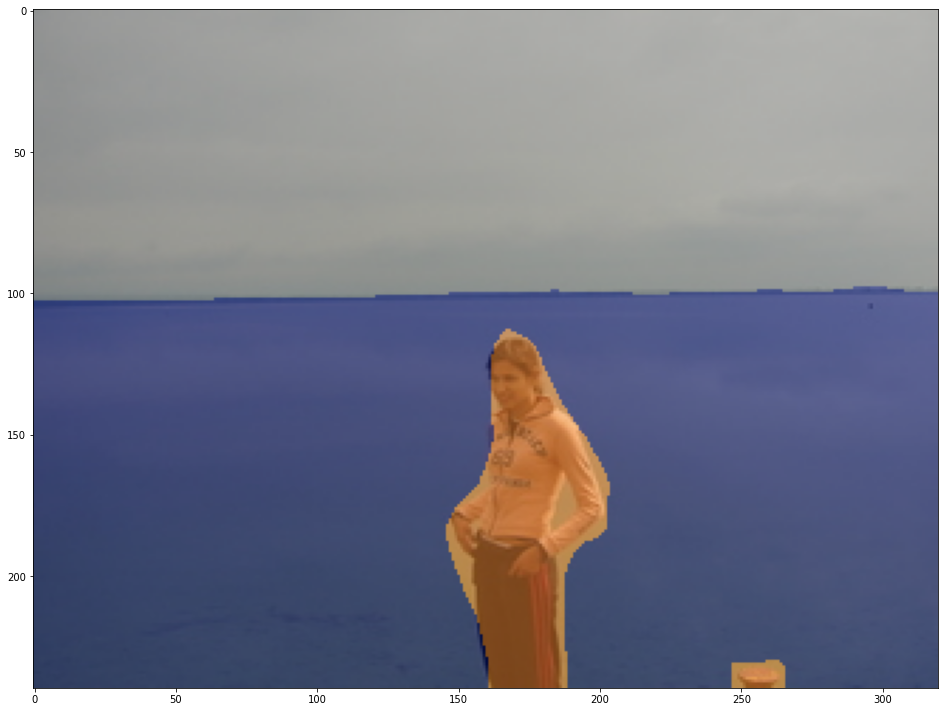

In [ ]:
img = mmcv.imread('iccv09Data/images/0005079.jpg')

model3.cfg = cfg
result = inference_segmentor(model3, img)
plt.figure(figsize=(8, 6))
show_result_pyplot(model, img, result, palette)

## Inference Comparison

<Figure size 288x216 with 0 Axes>

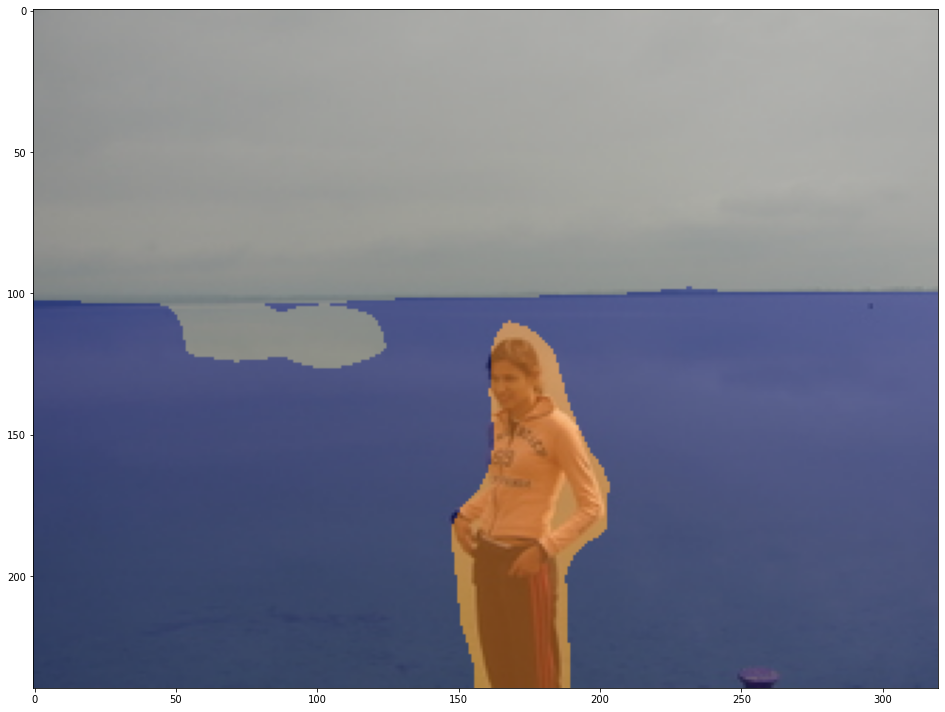

<Figure size 288x216 with 0 Axes>

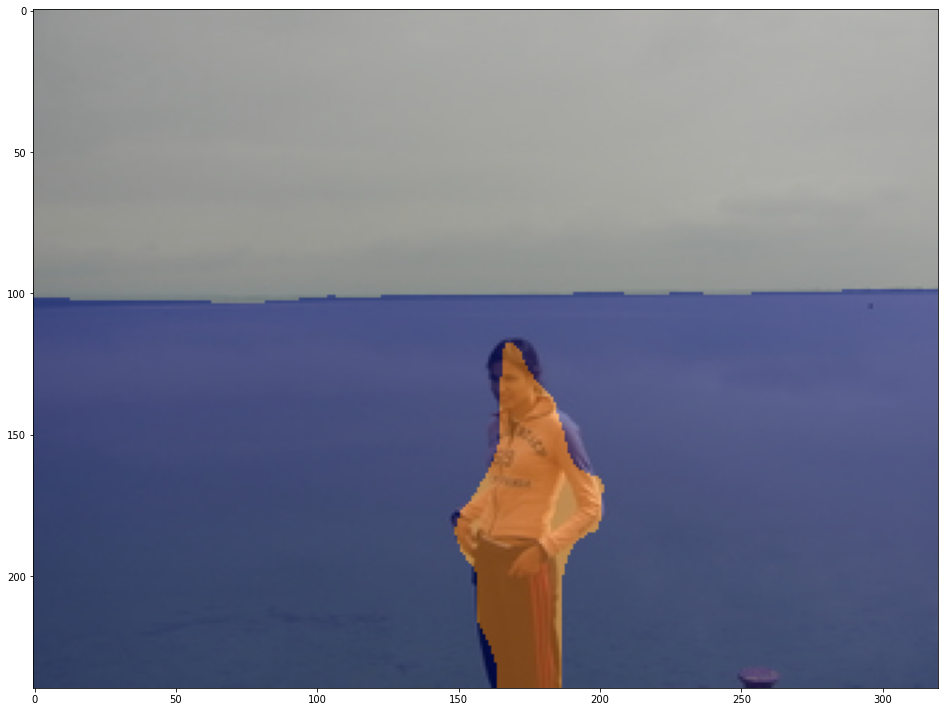

<Figure size 288x216 with 0 Axes>

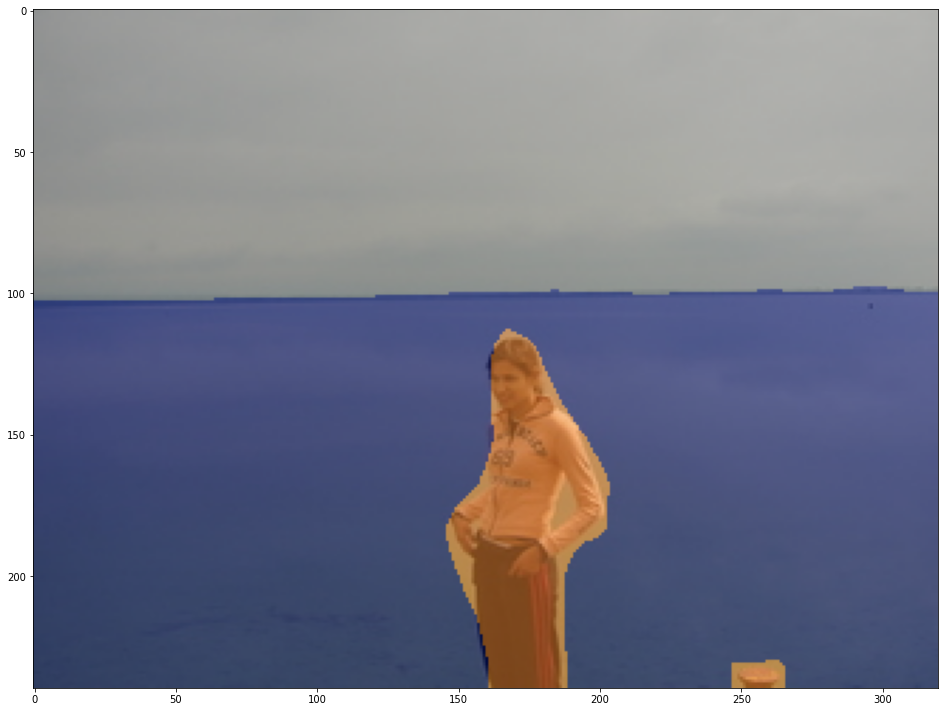

In [ ]:
img = mmcv.imread('iccv09Data/images/0005079.jpg')

model.cfg = cfg
result = inference_segmentor(model, img)
plt.figure(figsize=(4, 3))
show_result_pyplot(model, img, result, palette)
model2.cfg = cfg
result = inference_segmentor(model2, img)
plt.figure(figsize=(4, 3))
show_result_pyplot(model2, img, result, palette)
model3.cfg = cfg
result = inference_segmentor(model3, img)
plt.figure(figsize=(4, 3))
show_result_pyplot(model3, img, result, palette)